In [1]:
!pip install transformers==4.31.0 torch==2.0.1 scikit-learn==1.2.2 pandas==1.5.3 javalang==0.13.0


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.9/116.9 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 58.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 619.9/619.9 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 73.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 103.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.1/317.1 MB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 108.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.0/21.0 MB 88.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 849.3/849.3 kB 52.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 557.1/557.1 MB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 168.4/168.4 MB 13.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.6/54.6 MB 37.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 

In [2]:
import os
import zipfile
import glob
import subprocess
import javalang
import torch
import numpy as np
import pandas as pd
from transformers import RobertaTokenizer, RobertaModel


In [3]:
from google.colab import files

# 1. Dataset Preparation
uploaded = files.upload()


Saving Promisedataset-main.zip to Promisedataset-main.zip


In [4]:
import zipfile
import os

with zipfile.ZipFile('Promisedataset-main.zip', 'r') as zip_ref:
    zip_ref.extractall('Promisedataset')

In [5]:
import os

# Check the current working directory
print("Current working directory:", os.getcwd())

# List the contents of the 'Promisedataset' directory
extracted_dir = 'Promisedataset'
for root, dirs, files in os.walk(extracted_dir):
    for name in dirs:
        print("Directory:", os.path.join(root, name))
    for name in files:
        print("File:", os.path.join(root, name))


Current working directory: /content
Directory: Promisedataset/Promisedataset-main
File: Promisedataset/Zoom.lnk
File: Promisedataset/Promisedataset-main/log4j.rar
File: Promisedataset/Promisedataset-main/ant.rar
File: Promisedataset/Promisedataset-main/poi 3.13 src.rar
File: Promisedataset/Promisedataset-main/poi-1.5.0 src.rar
File: Promisedataset/Promisedataset-main/xalan.rar
File: Promisedataset/Promisedataset-main/lucene.rar
File: Promisedataset/Promisedataset-main/synapse.rar
File: Promisedataset/Promisedataset-main/Jedit.rar


In [14]:
# Unrar if necessary
!apt-get install unrar

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
unrar is already the newest version (1:6.1.5-1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


In [15]:
import os
import subprocess

def extract_rar_files(directory):
    for root, dirs, files in os.walk(directory):
        for file in files:
            if file.endswith(".rar"):
                file_path = os.path.join(root, file)
                output_dir = os.path.join(root, os.path.splitext(file)[0])
                if not os.path.exists(output_dir):
                    os.makedirs(output_dir)
                subprocess.run(['unrar', 'x', file_path, output_dir])

extract_rar_files('Promisedataset/Promisedataset-main')

In [16]:
import os

# Dictionary to store project-wise Java files
project_files = {}

def list_java_files(directory):
    for root, dirs, files in os.walk(directory):
        # Filter to include only xalan directories
        if 'synapse-1.1.1-src' in root or 'synapse-1.2-src' in root:
            project_name = os.path.basename(root)
            if project_name not in project_files:
                project_files[project_name] = []
            for file in files:
                if file.endswith(".java"):
                    project_files[project_name].append(os.path.join(root, file))

# Update the directory path to your Promisedataset directory
list_java_files('Promisedataset/Promisedataset-main')

# Display the project-wise Java files for only the targeted versions
for project, files in project_files.items():
    if files:  # Only display projects with Java files
        print(f"Project: {project}")
        for file in files:
            print(f"  File: {file}")
        print(f"Total Java Files in {project}: {len(files)}\n")


Project: synapse
  File: Promisedataset/Promisedataset-main/synapse/synapse/synapse-1.1 src/synapse-1.1.1-src/org/apache/synapse/Startup.java
  File: Promisedataset/Promisedataset-main/synapse/synapse/synapse-1.1 src/synapse-1.1.1-src/org/apache/synapse/ServerManager.java
  File: Promisedataset/Promisedataset-main/synapse/synapse/synapse-1.1 src/synapse-1.1.1-src/org/apache/synapse/SynapseServer.java
  File: Promisedataset/Promisedataset-main/synapse/synapse/synapse-1.1 src/synapse-1.1.1-src/org/apache/synapse/FaultHandler.java
  File: Promisedataset/Promisedataset-main/synapse/synapse/synapse-1.1 src/synapse-1.1.1-src/org/apache/synapse/SynapseException.java
  File: Promisedataset/Promisedataset-main/synapse/synapse/synapse-1.1 src/synapse-1.1.1-src/org/apache/synapse/ManagedLifecycle.java
  File: Promisedataset/Promisedataset-main/synapse/synapse/synapse-1.1 src/synapse-1.1.1-src/org/apache/synapse/Mediator.java
  File: Promisedataset/Promisedataset-main/synapse/synapse/synapse-1.1 s

In [17]:
import os

# Define the paths for training, validation, and test sets for Synapse
train_paths = [
    "Promisedataset/Promisedataset-main/synapse/synapse/synapse-1.1 src/synapse-1.1.1-src/",
    "Promisedataset/Promisedataset-main/synapse/synapse/synapse-1.2 src/synapse-1.2-src/"
]

# Since we don't have explicit validation and test folders like in Xalan, we'll treat these paths as needed.
# Here, both paths can be used for training or testing as per the requirement.

# Verify that the paths exist
for path in train_paths:
    print(f"Train path {path} exists:", os.path.exists(path))


Train path Promisedataset/Promisedataset-main/synapse/synapse/synapse-1.1 src/synapse-1.1.1-src/ exists: True
Train path Promisedataset/Promisedataset-main/synapse/synapse/synapse-1.2 src/synapse-1.2-src/ exists: True


In [18]:
import glob

# Function to get Java file paths
def get_java_files(directory):
    return glob.glob(os.path.join(directory, "**/*.java"), recursive=True)

# Load Java files into datasets
train_files = []
for path in train_paths:
    files = get_java_files(path)
    train_files.extend(files)
    print(f"Loaded {len(files)} training files from {path}")

print(f"Total training files: {len(train_files)}")


Loaded 721 training files from Promisedataset/Promisedataset-main/synapse/synapse/synapse-1.1 src/synapse-1.1.1-src/
Loaded 816 training files from Promisedataset/Promisedataset-main/synapse/synapse/synapse-1.2 src/synapse-1.2-src/
Total training files: 1537


In [19]:
from transformers import RobertaTokenizer

# Initialize the tokenizer for CodeBERT
tokenizer = RobertaTokenizer.from_pretrained("microsoft/codebert-base")

# Tokenize function for Java files
def tokenize_code(file_paths, tokenizer):
    inputs = []
    for file_path in file_paths:
        try:
            with open(file_path, 'r', encoding='utf-8', errors='ignore') as f:
                code = f.read()
            input_ids = tokenizer.encode(code, truncation=True, padding='max_length', max_length=512)
            inputs.append(input_ids)
        except Exception as e:
            print(f"Error reading {file_path}: {e}")
    return inputs

# Tokenize the train files
train_inputs = tokenize_code(train_files, tokenizer)

print("Tokenization complete!")
print(f"Number of tokenized training files: {len(train_inputs)}")


/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1150: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


Tokenization complete!
Number of tokenized training files: 1537


In [20]:
from torch.utils.data import Dataset

class CodeDataset(Dataset):
    def __init__(self, inputs):
        self.inputs = inputs
        self.labels = inputs  # Use inputs as labels for Masked Language Modeling (MLM)

    def __len__(self):
        return len(self.inputs)

    def __getitem__(self, idx):
        return {
            'input_ids': self.inputs[idx],
            'labels': self.inputs[idx]
        }

# Prepare the dataset
train_dataset = CodeDataset(train_inputs)


In [25]:
from transformers import RobertaForMaskedLM, Trainer, TrainingArguments
# Load the pre-trained CodeBERT model for MLM
model = RobertaForMaskedLM.from_pretrained("microsoft/codebert-base")

# Define training arguments
training_args = TrainingArguments(
    output_dir="./results",
    num_train_epochs=3,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    warmup_steps=500,
    weight_decay=0.01,
    logging_dir="./logs",
    evaluation_strategy="no"
)

# Initialize the Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
)

# Fine-tune the model
trainer.train()


/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1150: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Some weights of RobertaForMaskedLM were not initialized from the model checkpoint at microsoft/codebert-base and are newly initialized: ['lm_head.layer_norm.weight', 'lm_head.bias', 'lm_head.decoder.bias', 'lm_head.dense.bias', 'lm_head.dense.weight', 'lm_head.layer_norm.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Step,Training Loss
500,2.216700


TrainOutput(global_step=579, training_loss=1.9150170160904656, metrics={'train_runtime': 692.4703, 'train_samples_per_second': 6.659, 'train_steps_per_second': 0.836, 'total_flos': 1213917051257856.0, 'train_loss': 1.9150170160904656, 'epoch': 3.0})

In [26]:
def get_embeddings(inputs):
    embeddings = []
    model.eval()  # Switch to evaluation mode
    with torch.no_grad():
        for input_ids in inputs:
            input_ids = torch.tensor(input_ids).unsqueeze(0).to(model.device)  # Add batch dimension
            attention_mask = torch.tensor([1] * len(input_ids[0])).unsqueeze(0).to(model.device)
            outputs = model(input_ids=input_ids, attention_mask=attention_mask)
            logits = outputs.logits  # Use logits
            embedding = logits.mean(dim=1).squeeze().cpu().numpy()  # Mean pooling
            embeddings.append(embedding)
    return np.array(embeddings)

# Generate embeddings for training set
train_embeddings = get_embeddings(train_inputs)

print("Embeddings generated.")


Embeddings generated.


In [28]:
# Importing necessary libraries
from google.colab import files
import pandas as pd

# Upload and load the CSV files for Synapse versions
uploaded = files.upload()

# Now load the CSVs using Pandas (adjust filenames to the correct Synapse CSVs)
synapse_1_1_df = pd.read_csv('synapse-1.1.csv')
synapse_1_2_df = pd.read_csv('synapse-1.2.csv')

# Extract relevant columns (name and bug)
relevant_columns = ['name', 'bug']
synapse_1_1_labels = synapse_1_1_df[relevant_columns]
synapse_1_2_labels = synapse_1_2_df[relevant_columns]


Saving synapse-1.1.csv to synapse-1.1.csv
Saving synapse-1.2.csv to synapse-1.2.csv


In [39]:
import os

# Function to map defect labels to Java file names
def get_defect_labels(file_paths, labels_df):
    labels = []
    for file_path in file_paths:
        # Modify matching to look for broader match, e.g., based on 'synapse' keyword
        if 'synapse' in file_path:
            # Assuming "synapse" means the project as in the label dataframe
            label_row = labels_df[labels_df['name'].str.contains('synapse', na=False)]
            if not label_row.empty:
                labels.append(int(label_row['bug'].values[0]))
            else:
                labels.append(None)
        else:
            labels.append(None)
    return labels

# Get labels for train datasets (adjust for Synapse)
train_labels_1_1 = get_defect_labels([f for f in train_files if f.startswith(train_paths[0])], synapse_1_1_labels)
train_labels_1_2 = get_defect_labels([f for f in train_files if f.startswith(train_paths[1])], synapse_1_2_labels)
train_labels = train_labels_1_1 + train_labels_1_2

# Commenting out validation and test labels as we don't have them for Synapse
# validation_labels = []  # If applicable, load the validation labels for Synapse
# test_labels = get_defect_labels(test_files, synapse_1_2_labels)

print("Defect labels mapped to Java files.")


Defect labels mapped to Java files.


In [37]:
print(synapse_1_1_labels.head())  # Check the first few rows of the labels dataframe
print(synapse_1_2_labels.head())


      name  bug
0  synapse    0
1  synapse    1
2  synapse    0
3  synapse    0
4  synapse    0
      name  bug
0  synapse    1
1  synapse    0
2  synapse    4
3  synapse    0
4  synapse    1


In [38]:
print(f"Sample of train files: {train_files[:5]}")


Sample of train files: ['Promisedataset/Promisedataset-main/synapse/synapse/synapse-1.1 src/synapse-1.1.1-src/org/apache/synapse/Startup.java', 'Promisedataset/Promisedataset-main/synapse/synapse/synapse-1.1 src/synapse-1.1.1-src/org/apache/synapse/ServerManager.java', 'Promisedataset/Promisedataset-main/synapse/synapse/synapse-1.1 src/synapse-1.1.1-src/org/apache/synapse/SynapseServer.java', 'Promisedataset/Promisedataset-main/synapse/synapse/synapse-1.1 src/synapse-1.1.1-src/org/apache/synapse/FaultHandler.java', 'Promisedataset/Promisedataset-main/synapse/synapse/synapse-1.1 src/synapse-1.1.1-src/org/apache/synapse/SynapseException.java']


In [34]:
print(f"Shape of the original train embeddings: {train_embeddings.shape}")


Shape of the original train embeddings: (1537, 50265)


In [40]:
import numpy as np

# Function to filter data based on valid labels
def filter_data(embeddings, labels):
    filtered_embeddings = []
    filtered_labels = []
    for emb, label in zip(embeddings, labels):
        if label is not None:
            filtered_embeddings.append(emb)
            filtered_labels.append(label)
    return np.array(filtered_embeddings), filtered_labels

# Assuming `train_embeddings` holds the embeddings generated previously for the Synapse dataset
train_embeddings_filtered, y_train = filter_data(train_embeddings, train_labels)

print(f"Filtered train embeddings: {train_embeddings_filtered.shape}")
print(f"Filtered train labels: {len(y_train)}")


Filtered train embeddings: (1537, 50265)
Filtered train labels: 1537


In [41]:
# Save filtered embeddings and labels for future use
np.save("synapse_train_embeddings_codebert.npy", train_embeddings_filtered)
np.save("synapse_train_labels_codebert.npy", np.array(y_train))

print("Filtered embeddings and labels saved.")


Filtered embeddings and labels saved.


### **CodeBERT vs Code2Vec**


In [42]:
# Upload Code2Vec .vector file for comparison
from google.colab import files
import numpy as np
from sklearn.decomposition import PCA

uploaded = files.upload()  # Ensure you upload the correct Synapse .c2v file

# Load Code2Vec embeddings (adjust the file name as needed)
code2vec_vectors = np.loadtxt('synapse_dataset.test.c2v.vectors')

# Apply PCA to reduce the embeddings to match the dimensionality of CodeBERT (256 dimensions)
pca = PCA(n_components=256)
code2vec_vectors_pca = pca.fit_transform(code2vec_vectors)

print(f"Code2Vec embeddings shape after PCA: {code2vec_vectors_pca.shape}")


Saving synapse_dataset.test.c2v.vectors to synapse_dataset.test.c2v.vectors
Code2Vec embeddings shape after PCA: (1413, 256)


In [51]:
from sklearn.decomposition import PCA

# Apply PCA to reduce CodeBERT embeddings to 256 dimensions
pca_codebert = PCA(n_components=256)
X_codebert_pca = pca_codebert.fit_transform(X_codebert)

# Now print the shapes after applying PCA
print(f"CodeBERT embeddings after PCA: {X_codebert_pca.shape}")
print(f"Code2Vec embeddings (already PCA applied): {X_code2vec.shape}")


CodeBERT embeddings after PCA: (1413, 256)
Code2Vec embeddings (already PCA applied): (1413, 256)


In [52]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Initialize RandomForest for CodeBERT
clf_codebert = RandomForestClassifier(random_state=42)
clf_codebert.fit(X_codebert_pca, y_aligned)  # Use the aligned labels

# Initialize RandomForest for Code2Vec
clf_code2vec = RandomForestClassifier(random_state=42)
clf_code2vec.fit(X_code2vec, y_aligned)  # Use the aligned labels

# Evaluate both models (you can also perform a train-test split if necessary)

# CodeBERT evaluation
y_pred_codebert = clf_codebert.predict(X_codebert_pca)
accuracy_codebert = accuracy_score(y_aligned, y_pred_codebert)
precision_codebert = precision_score(y_aligned, y_pred_codebert, average='weighted', zero_division=0)
recall_codebert = recall_score(y_aligned, y_pred_codebert, average='weighted', zero_division=0)
f1_codebert = f1_score(y_aligned, y_pred_codebert, average='weighted', zero_division=0)

print(f"CodeBERT - Accuracy: {accuracy_codebert:.4f}")
print(f"CodeBERT - Precision: {precision_codebert:.4f}")
print(f"CodeBERT - Recall: {recall_codebert:.4f}")
print(f"CodeBERT - F1-Score: {f1_codebert:.4f}")

# Code2Vec evaluation
y_pred_code2vec = clf_code2vec.predict(X_code2vec)
accuracy_code2vec = accuracy_score(y_aligned, y_pred_code2vec)
precision_code2vec = precision_score(y_aligned, y_pred_code2vec, average='weighted', zero_division=0)
recall_code2vec = recall_score(y_aligned, y_pred_code2vec, average='weighted', zero_division=0)
f1_code2vec = f1_score(y_aligned, y_pred_code2vec, average='weighted', zero_division=0)

print(f"Code2Vec - Accuracy: {accuracy_code2vec:.4f}")
print(f"Code2Vec - Precision: {precision_code2vec:.4f}")
print(f"Code2Vec - Recall: {recall_code2vec:.4f}")
print(f"Code2Vec - F1-Score: {f1_code2vec:.4f}")


CodeBERT - Accuracy: 0.9979
CodeBERT - Precision: 0.9979
CodeBERT - Recall: 0.9979
CodeBERT - F1-Score: 0.9979
Code2Vec - Accuracy: 0.9646
Code2Vec - Precision: 0.9646
Code2Vec - Recall: 0.9646
Code2Vec - F1-Score: 0.9646


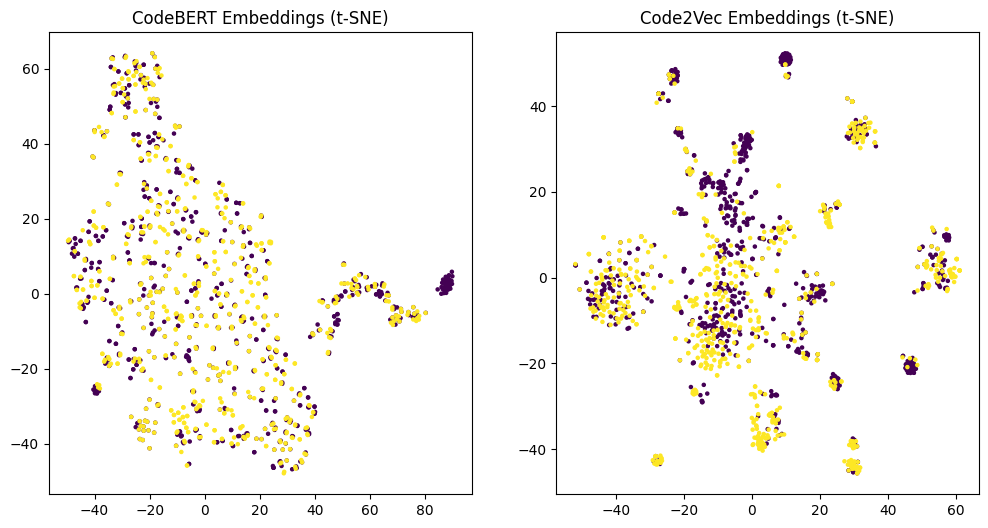

In [53]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# Reduce the embeddings further to 2D using t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_codebert_tsne = tsne.fit_transform(X_codebert_pca)
X_code2vec_tsne = tsne.fit_transform(X_code2vec)

# Plot the embeddings
plt.figure(figsize=(12, 6))

# CodeBERT embeddings
plt.subplot(1, 2, 1)
plt.scatter(X_codebert_tsne[:, 0], X_codebert_tsne[:, 1], c=y_aligned, cmap='viridis', s=5)
plt.title("CodeBERT Embeddings (t-SNE)")

# Code2Vec embeddings
plt.subplot(1, 2, 2)
plt.scatter(X_code2vec_tsne[:, 0], X_code2vec_tsne[:, 1], c=y_aligned, cmap='viridis', s=5)
plt.title("Code2Vec Embeddings (t-SNE)")

plt.show()
